In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
df=pd.read_csv('netflix.csv')

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Finding the missing values

In [5]:
print(df.isnull().any())

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
dtype: bool


# Filling the missing Values

In [5]:
data.director.fillna('No Director',inplace=True)
data.cast.fillna('No cast',inplace=True)
data.country.fillna('No Country',inplace=True)
data.dropna(subset=['date_added','rating'],inplace=True)

In [6]:
print(data.isnull().any())

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration         True
listed_in       False
description     False
dtype: bool


# Content wise Distribution

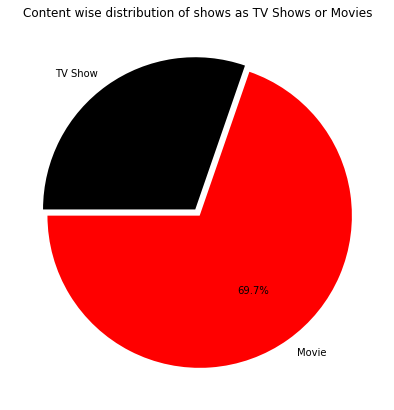

In [7]:
plt.figure(figsize=(13,7))
plt.title('Content wise distribution of shows as TV Shows or Movies')
g=plt.pie(data.type.value_counts(),explode=(0.025,0.025),labels=data.type.value_counts().index,colors=['red','black'],autopct='%1.1f%%',startangle=180)
plt.show()

In [15]:
data_movies = data[data.type.str.contains('Movie')]
data_shows = data[data.type.str.contains('TV Show')]
data.date_added = pd.DatetimeIndex(data.date_added).year
data_movies.date_added = pd.DatetimeIndex(data_movies.date_added).year
data_shows.date_added = pd.DatetimeIndex(data_shows.date_added).year

data_year = data.date_added.value_counts().to_frame().reset_index().rename(columns={'index':'year','date_added':'count'})
data_year = data_year[data_year.year != 2022]

movie_year = data_movies.date_added.value_counts().to_frame().reset_index().rename(columns={'index':'year','date_added':'count'})
movie_year = movie_year[movie_year != 2022]

show_year = data_shows.date_added.value_counts().to_frame().reset_index().rename(columns={'index':'year','date_added':'count'})
show_year = show_year[show_year != 2022]



C:\Users\dhole\AppData\Local\Temp\ipykernel_7140\143987337.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_movies.date_added = pd.DatetimeIndex(data_movies.date_added).year
C:\Users\dhole\AppData\Local\Temp\ipykernel_7140\143987337.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_shows.date_added = pd.DatetimeIndex(data_shows.date_added).year


# Top Countries

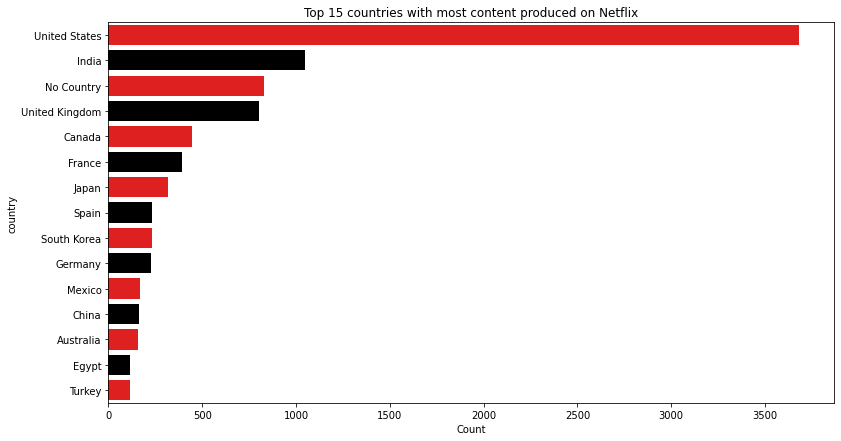

In [47]:
filtered_countrie=data.set_index('title').country.str.split(', ',expand=True).stack().reset_index(level=1,drop=True)
filtered_countrie=filtered_countrie[filtered_countrie != 'Country Unavailable']
plt.figure(figsize=(13,7))
g=sns.countplot(y=filtered_countrie,order=filtered_countrie.value_counts().index[:15],palette=['red','black'])
plt.title('Top 15 countries with most content produced on Netflix')
plt.xlabel('Count')
plt.ylabel('country')
plt.show()

# Top Directors 

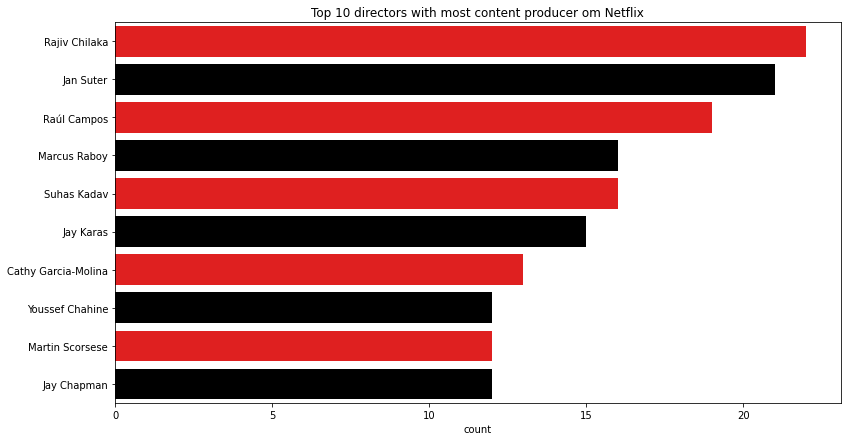

In [39]:
filtered_directors=data[data.director != 'No Director'].set_index('title').director.str.split(', ',expand=True).stack().reset_index(level=1,drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 directors with most content producer om Netflix')
sns.countplot(y=filtered_directors,order=filtered_directors.value_counts().index[:10],palette=['red','black'])
plt.show()

# Top Genres 

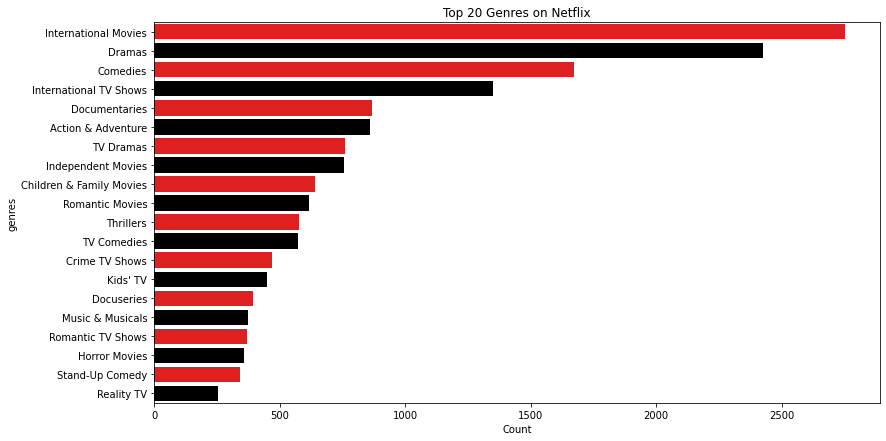

In [41]:
filtered_genres=data.set_index('title').listed_in.str.split(', ',expand=True).stack().reset_index(level=1,drop=True)
plt.figure(figsize=(13,7))
g=sns.countplot(y=filtered_genres,order=filtered_genres.value_counts().index[:20],palette=['red','black'])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('genres')
plt.show()

# Top Rating

C:\Users\dhole\AppData\Local\Temp\ipykernel_7140\2110536716.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  count_shows=count_shows.append([{'rating':'NC-17','title':0},


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (12,) and arg 3 with shape (17,).

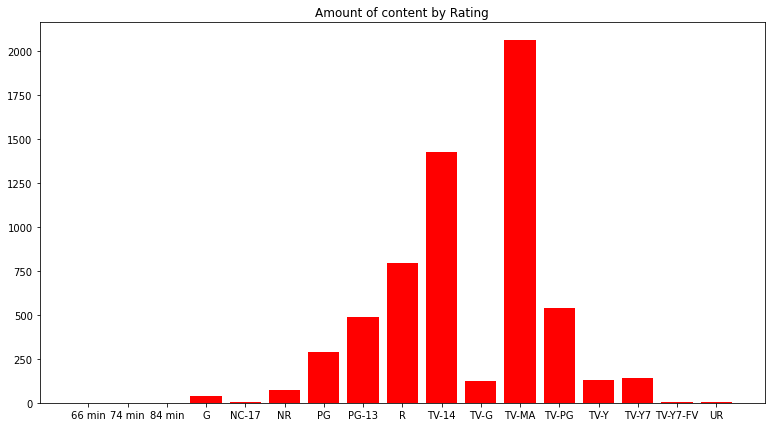

In [43]:
order=data.rating.unique()
count_movies=data_movies.groupby('rating')['title'].count().reset_index()
count_shows=data_shows.groupby('rating')['title'].count().reset_index()
count_shows=count_shows.append([{'rating':'NC-17','title':0},
                               {'rating':'PG-13','title':0},
                               {'rating':'UR','title':0}],ignore_index=True)
count_shows.sort_values(by='rating',ascending=True)
plt.figure(figsize=(13,7))
plt.title('Amount of content by Rating')
plt.bar(count_movies.rating,count_movies.title,color='red')
plt.bar(count_shows.rating,count_shows.title,bottom=count_movies.title,color='black')
plt.legend(['TV Shows','Movies'])
plt.show()

# Top Actors with TV Show

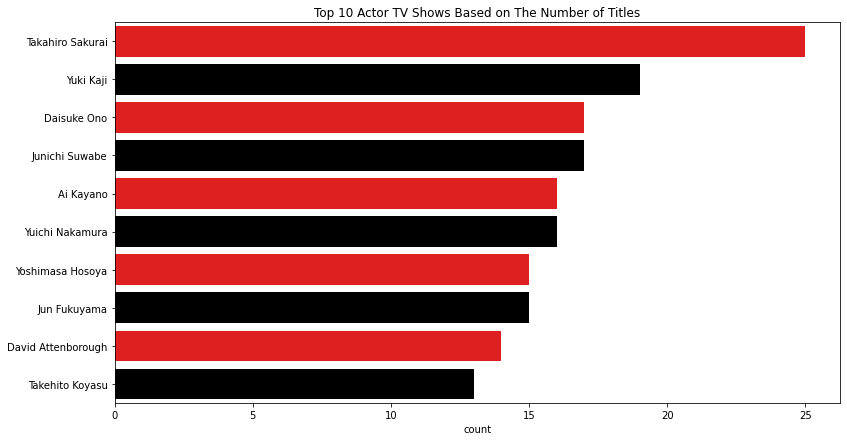

In [45]:
filtered_cast_shows = data_shows[data_shows.cast != 'No cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Actor TV Shows Based on The Number of Titles')
sns.countplot(y = filtered_cast_shows, order=filtered_cast_shows.value_counts().index[:10], palette=['red','black'])
plt.show()


# Top actor with Movies

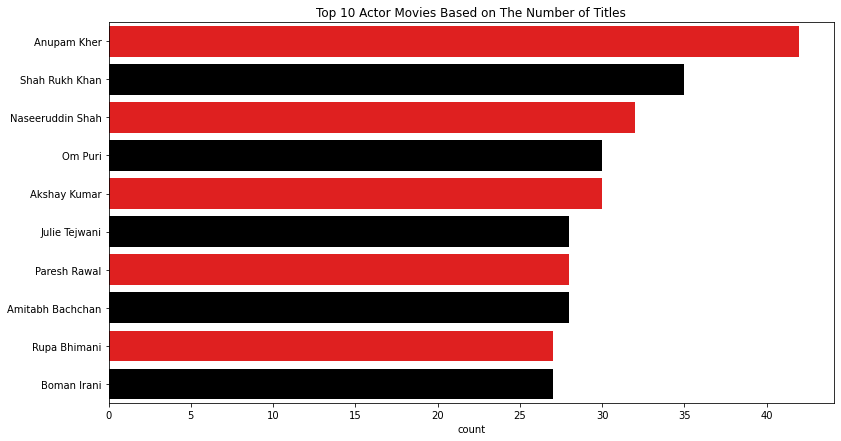

In [46]:
filtered_cast_movie = data_movies[data_movies.cast != 'No cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Actor Movies Based on The Number of Titles')
sns.countplot(y = filtered_cast_movie, order=filtered_cast_movie.value_counts().index[:10], palette=['red','black'])
plt.show()